In [ ]:
# Importing all the Required Libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/Colab Notebooks'

In [ ]:
#Reading Dataset
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
print('Dimension of New York City Taxi Fare Prediction Data:', df.shape)

Dimension of New York City Taxi Fare Prediction Data: (50000, 8)


In [ ]:
#Checkout column
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [ ]:
#Find the duplicates
print('Duplicate of Earthquake Predication Data:', len(df[df.duplicated()]))

Duplicate of Earthquake Predication Data: 0


In [ ]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
#Find null values
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<Axes: >

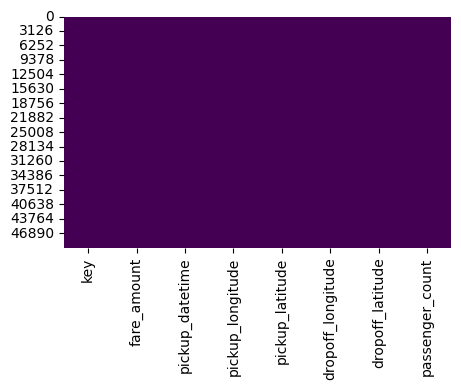

In [ ]:
#Visualizing the missing values
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
#Identifying the unique number of values in the dataset
df.nunique()

key                  50000
fare_amount            703
pickup_datetime      49555
pickup_longitude     33728
pickup_latitude      36609
dropoff_longitude    34893
dropoff_latitude     37428
passenger_count          7
dtype: int64

In [ ]:
print(df.apply(lambda col: col.unique()))

key                  [2009-06-15 17:26:21.0000001, 2010-01-05 16:52...
fare_amount          [4.5, 16.9, 5.7, 7.7, 5.3, 12.1, 7.5, 16.5, 9....
pickup_datetime      [2009-06-15 17:26:21 UTC, 2010-01-05 16:52:16 ...
pickup_longitude     [-73.844311, -74.016048, -73.982738, -73.98713...
pickup_latitude      [40.721319, 40.711303, 40.76127, 40.733143, 40...
dropoff_longitude    [-73.84161, -73.979268, -73.991242, -73.991567...
dropoff_latitude     [40.712278000000005, 40.782004, 40.750562, 40....
passenger_count                                  [1, 2, 3, 6, 5, 4, 0]
dtype: object


In [ ]:
#Viewing the data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
pickup_longitude,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
pickup_latitude,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
dropoff_longitude,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
dropoff_latitude,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
passenger_count,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


In [ ]:
#Converts a column into datetime format
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [ ]:
for i in ['key','pickup_datetime']:
    change_into_datetime(i)

In [ ]:
df.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
#Extracting the year, month, date and week day of the ride
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.day
df['pickup_day_of_month'] = df['pickup_datetime'].dt.dayofweek

In [ ]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1


In [ ]:
#Extracting the Hour, Minute and Seconds value

def extract_hour(df,col):
    df[col + '_hour'] = df[col].dt.hour

def extract_minute(df,col):
    df[col + '_minute'] = df[col].dt.minute

def extract_second(df,col):
    df[col + '_second'] = df[col].dt.second

In [ ]:
extract_hour(df,'pickup_datetime')
extract_minute(df,'pickup_datetime')
extract_second(df,'pickup_datetime')

In [ ]:
# Drop columns 'key' and 'pickup_datetime'
df.drop(columns=['key','pickup_datetime'], axis=1, inplace=True)

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,0


In [ ]:
#Removing the Latitude values that are greater than 90 or lesser than -90
df['pickup_latitude'].describe()

count    50000.000000
mean        39.933759
std          6.224857
min        -74.006893
25%         40.734880
50%         40.752678
75%         40.767360
max        401.083332
Name: pickup_latitude, dtype: float64

In [ ]:
df['dropoff_latitude'].describe()

count    50000.000000
mean        39.926251
std          6.014737
min        -74.006377
25%         40.734372
50%         40.753372
75%         40.768167
max         43.415190
Name: dropoff_latitude, dtype: float64

In [ ]:
len(df[df['pickup_latitude'] < -90 ]) #number of records which has latitude < -90

0

In [ ]:
len(df[df['pickup_latitude'] > 90 ])  #number of records which has latitude > 90

1

In [ ]:
len(df[df['dropoff_latitude'] < -90 ]) #number of records which has latitude < -90

0

In [ ]:
len(df[df['dropoff_latitude']  > 90 ]) #number of records which has latitude > 90

0

In [ ]:
df.drop(df[df['pickup_latitude'] < -90].index, axis = 0, inplace = True)
df.drop(df[df['pickup_latitude'] > 90].index, axis = 0, inplace = True)

df.drop(df[df['dropoff_latitude'] < -90].index, axis = 0, inplace = True)
df.drop(df[df['dropoff_latitude'] > 90].index, axis = 0, inplace = True)

In [ ]:
#Removing the Longitude values that are greater than 180 or lesser than -180
df['pickup_longitude'].describe()

count    49999.000000
mean       -72.509727
std         10.393962
min        -75.423848
25%        -73.992062
50%        -73.981840
75%        -73.967151
max         40.783472
Name: pickup_longitude, dtype: float64

In [ ]:
df['dropoff_longitude'].describe()

count    49999.000000
mean       -72.504587
std         10.407672
min        -84.654241
25%        -73.991152
50%        -73.980083
75%        -73.963584
max         40.851027
Name: dropoff_longitude, dtype: float64

In [ ]:
len(df[df['pickup_longitude'] < -180])   #number of records which has longitude < -180

0

In [ ]:
len(df[df['dropoff_longitude'] < -180])   #number of records which has longitude < -180

0

In [ ]:
len(df[df['pickup_longitude'] > 180])   #number of records which has longitude > 180


0

In [ ]:
len(df[df['dropoff_longitude'] > 180])   #number of records which has longitude > 180


0

In [ ]:
df.drop(df[df['pickup_longitude'] < -180].index, axis = 0, inplace = True)

df.drop(df[df['dropoff_longitude'] < -180].index, axis = 0, inplace = True)

In [ ]:
df.shape

(49999, 13)

 **Haversine distance between pickup and dropoff locations**
 The Haversine formula is based on spherical trigonometry and is designed to calculate the great-circle distance between two points on the Earth’s surface. The formula is as follows:

a = sin²(Δφ/2) + cos(φ1) * cos(φ2) * sin²(Δλ/2)

c = 2 * atan2(√a, √(1-a))

d = R * c
where
* Δφ is the difference in latitude between the two points.
* Δλ is the difference in longitude between the two points.
* φ1 and φ2 are the latitudes of the two points.
* R is the Earth’s radius, which is approximately 6,371 kilometers (3,959 miles).
* d represents the calculated distance between the two points.

In [ ]:
#Calculating the Haversine Distance

def haversine_distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):

    data = [df]

    for i in data:
        R = 6371 # radius of the erth in kilometers
        phi1 = np.radians(i[pickup_latitude])
        phi2 = np.radians(i[dropoff_latitude])

        delta_phi = np.radians(i[dropoff_latitude] - i[pickup_latitude])
        delta_lambda = np.radians(i[dropoff_longitude] - i[pickup_longitude])

        a = np.sin(delta_phi / 2.0) **2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

        d = R * c

        i['harvesine_distance'] = d

    return d

In [ ]:
haversine_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Length: 49999, dtype: float64

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,harvesine_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,21,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,42,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,0,1.999157


In [ ]:
#Removing all the rows where passengers count is more than 6

df['passenger_count'].describe()

count    49999.000000
mean         1.667853
std          1.289204
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [ ]:
df[df['passenger_count'] > 6].count()

fare_amount               0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
passenger_count           0
pickup_year               0
pickup_month              0
pickup_date               0
pickup_day_of_month       0
pickup_datetime_hour      0
pickup_datetime_minute    0
pickup_datetime_second    0
harvesine_distance        0
dtype: int64

In [ ]:
df.drop(df[df['passenger_count'] > 6].index, axis = 0,inplace = True)

In [ ]:
df[df['passenger_count'] > 6].count()

fare_amount               0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
passenger_count           0
pickup_year               0
pickup_month              0
pickup_date               0
pickup_day_of_month       0
pickup_datetime_hour      0
pickup_datetime_minute    0
pickup_datetime_second    0
harvesine_distance        0
dtype: int64

In [ ]:
#Preprocessing the target column -> Fare amount

df['fare_amount'].describe()

count    49999.000000
mean        11.364333
std          9.685587
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: fare_amount, dtype: float64

In [ ]:
from collections import Counter
Counter(df['fare_amount'] < 0)  #counting nagetive records

Counter({False: 49993, True: 6})

In [ ]:
df = df.drop(df[df['fare_amount'] < 0].index, axis = 0)
df.shape

(49993, 14)

In [ ]:
df['fare_amount'].sort_values(ascending = False)

28373    200.00
1335     180.00
43956    165.00
1483     165.00
46198    160.00
          ...  
26712      2.50
2780       0.01
47302      0.00
27891      0.00
10002      0.00
Name: fare_amount, Length: 49993, dtype: float64

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

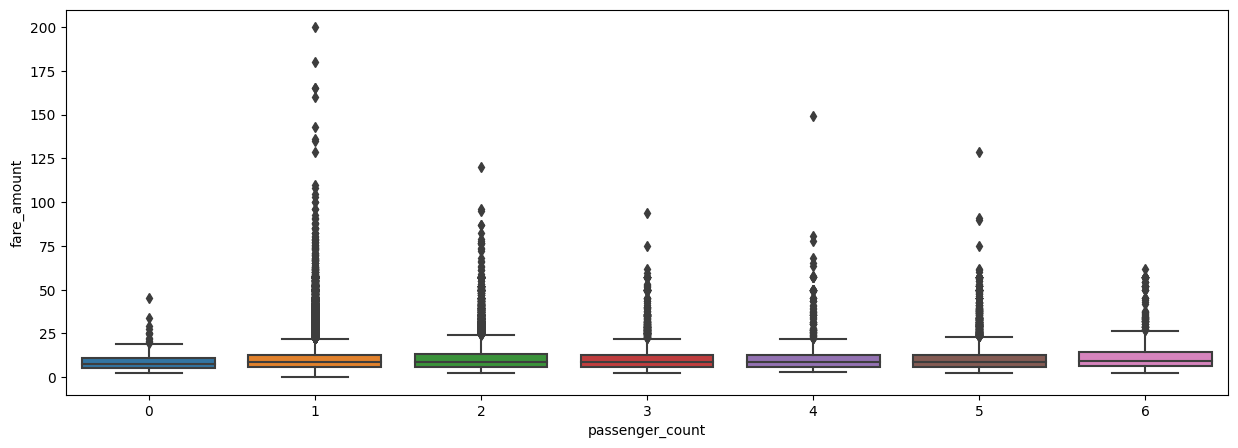

In [ ]:
#Visualizing Fare Amount Vs passenger Count

plt.figure(figsize=(15,5))
sns.boxplot(x ='passenger_count', y ='fare_amount', data = df.sort_values('fare_amount', ascending=False))

<Axes: xlabel='pickup_date', ylabel='fare_amount'>

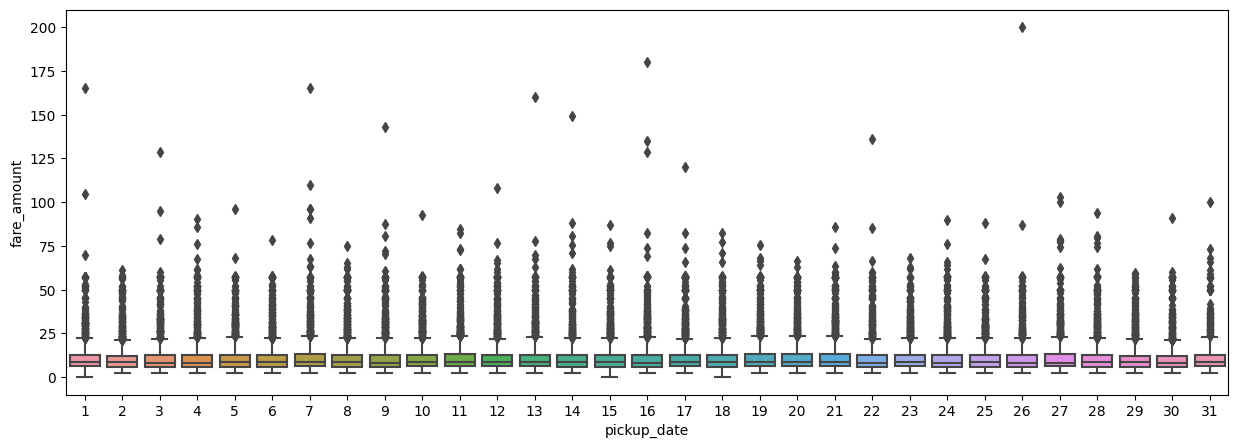

In [ ]:
#Amount Vs Pickup date
plt.figure(figsize=(15,5))
sns.boxplot(x ='pickup_date', y ='fare_amount', data = df.sort_values('fare_amount', ascending=False))

<Axes: xlabel='pickup_datetime_hour', ylabel='fare_amount'>

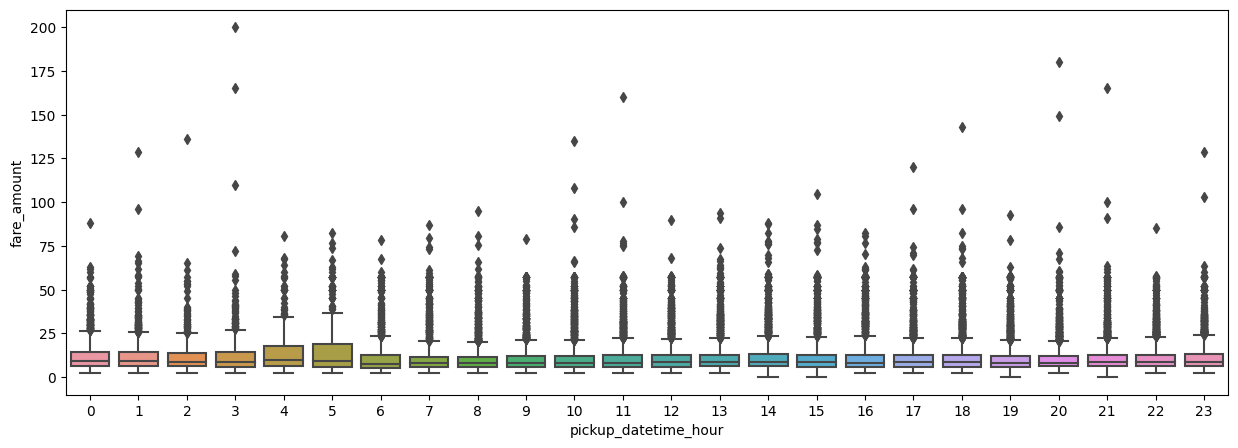

In [ ]:
#Amount Vs Pickup Time (Hour)
plt.figure(figsize=(15,5))
sns.boxplot(x ='pickup_datetime_hour', y ='fare_amount', data = df.sort_values('fare_amount', ascending=False))

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,harvesine_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,21,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,42,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,0,1.999157


In [ ]:
#Dealing with Outliers
def plot(df,col):
    fig, (ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

<ipython-input-372-e59d1888ab18>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax1)


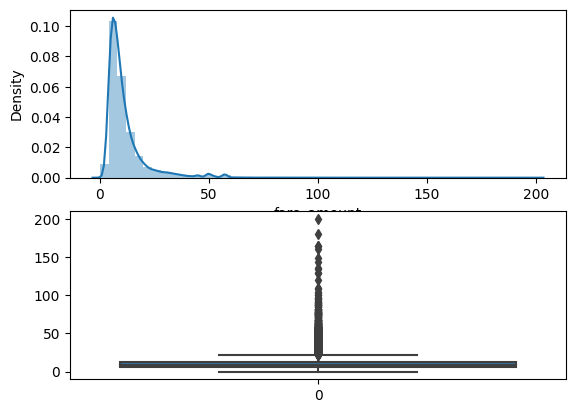

In [ ]:
plot(df,'fare_amount')

<ipython-input-372-e59d1888ab18>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax1)


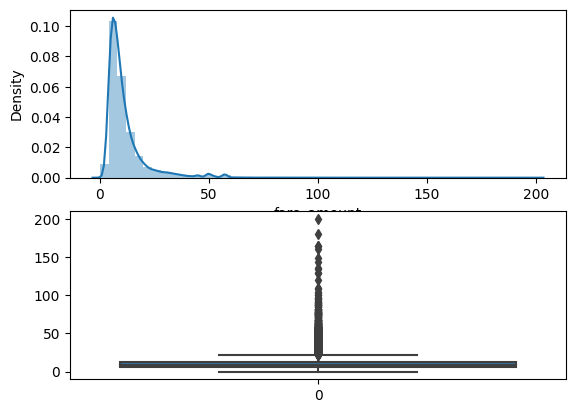

In [ ]:
df['fare_amount'] = np.where(df['fare_amount']>=300,df['fare_amount'].median(),df['fare_amount'])
plot(df,'fare_amount')

In [ ]:
df.shape

(49993, 14)

In [ ]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [ ]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

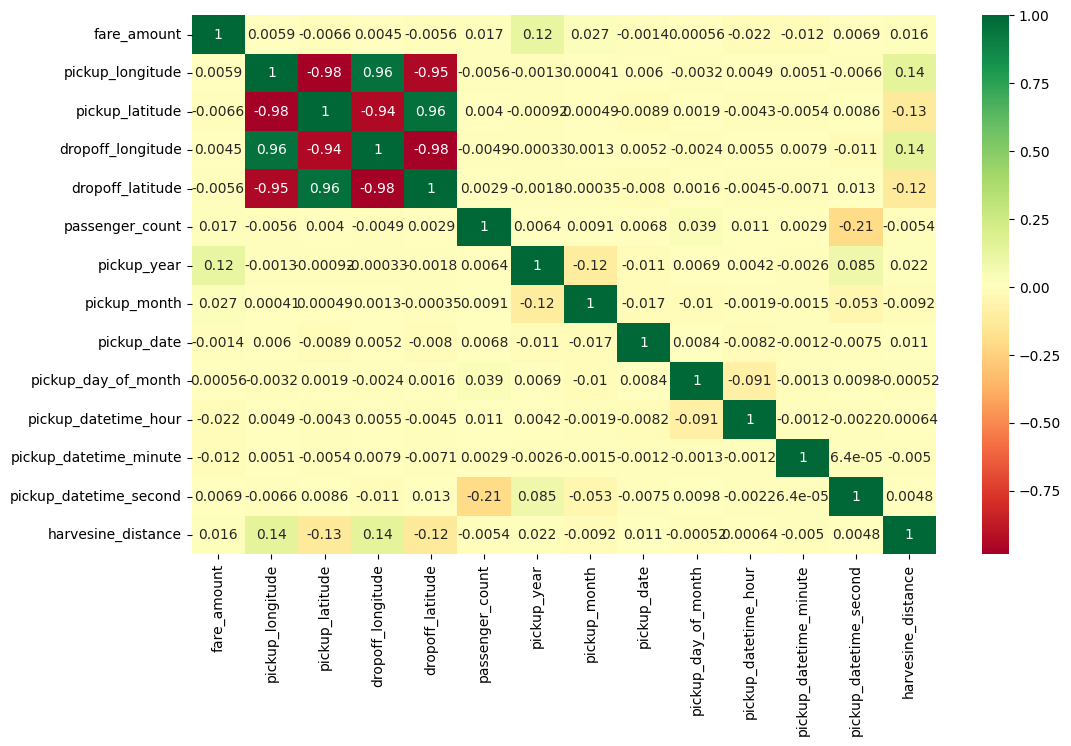

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[0.09604052 0.04312802 0.09088391 0.04874823 0.01095629 0.02052937
 0.01896475 0.02123913 0.01805595 0.02415491 0.02133793 0.01703143
 0.56892955]


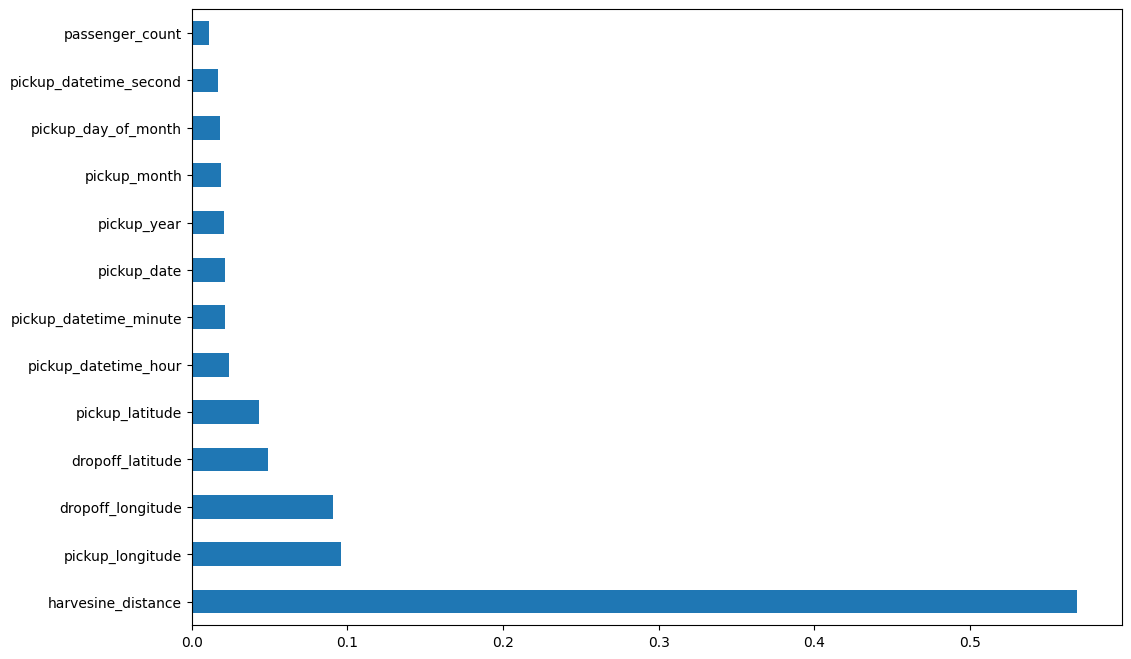

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,harvesine_distance
674,-73.968212,40.762212,-73.919958,40.755087,2,2010,5,7,4,20,5,0,4.140762
4341,-74.000113,40.733058,-73.961070,40.719011,1,2010,11,20,5,4,18,8,3.642009
20486,-73.982418,40.761798,-73.990293,40.751410,2,2011,3,3,3,13,43,0,1.331995
14115,0.000000,0.000000,0.000000,0.000000,5,2014,6,11,2,21,23,0,0.000000
3828,-73.960227,40.710427,-73.994551,40.722872,1,2010,3,17,2,14,59,57,3.206763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,-73.954745,40.773392,-73.971870,40.760192,1,2014,9,8,0,6,39,0,2.057742
44739,-73.994435,40.755432,-73.981655,40.778307,1,2014,10,25,5,2,3,49,2.761919
38164,-73.974420,40.750743,-73.974375,40.761395,5,2011,4,25,0,10,3,0,1.184454
860,-73.987243,40.722410,-73.971620,40.761990,1,2012,5,26,5,1,15,11,4.593692


In [ ]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,harvesine_distance
12846,-73.977200,40.751600,-73.956100,40.772100,2,2011,11,18,4,18,41,12,2.890356
37517,-73.998788,40.717074,-73.991944,40.714899,1,2011,4,4,0,20,12,37,0.625465
20761,-73.980096,40.763978,-73.959348,40.763222,1,2011,1,29,5,15,25,40,1.749421
6708,-73.991087,40.749643,-73.978962,40.762451,2,2014,2,16,6,11,13,29,1.752520
20264,-73.988925,40.721508,-73.987666,40.770295,1,2012,5,12,5,19,14,8,5.425904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35503,-73.985333,40.756898,-73.988893,40.758678,2,2011,2,14,0,21,24,0,0.359284
45491,-73.967431,40.788102,-73.973699,40.784294,1,2014,12,27,5,12,37,21,0.676590
42166,-73.970434,40.752903,-73.982122,40.751667,1,2014,3,12,2,14,57,8,0.994079
28832,-73.973939,40.743263,-73.974277,40.751060,1,2013,12,19,3,12,16,9,0.867454


In [ ]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
import pickle
pickle.dump(scaler,open('Scaling.pkl','wb'))

In [ ]:
#Download Pickle File to Local Machine
from google.colab import files
files.download('Scaling.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train

array([[-0.13994255,  0.13896931, -0.13547154, ..., -1.42144261,
        -0.81714047, -0.04146121],
       [-0.14302414,  0.13407916, -0.13944012, ..., -0.67130719,
        -0.40583096, -0.04282682],
       [-0.14131483,  0.13889986, -0.14226104, ...,  0.77126094,
        -0.81714047, -0.04915177],
       ...,
       [-0.14054224,  0.13704555, -0.14072446, ..., -1.53684806,
        -0.81714047, -0.04955574],
       [-0.14178092,  0.13229312, -0.14045852, ..., -0.84441536,
        -0.2515899 , -0.04022106],
       [-0.14255293,  0.1394289 , -0.14242562, ...,  1.63680181,
        -0.81714047, -0.05124266]])

In [ ]:
X_test

array([[-0.14081078,  0.1371893 , -0.13896036, ...,  0.65585549,
        -0.20017621, -0.04488489],
       [-0.14289615,  0.13139809, -0.14242041, ..., -1.01752354,
         1.085166  , -0.05108628],
       [-0.14109053,  0.13926553, -0.13927389, ..., -0.26738811,
         1.23940706, -0.04800883],
       ...,
       [-0.14015719,  0.13740786, -0.14147228, ...,  1.57909909,
        -0.40583096, -0.050077  ],
       [-0.14049577,  0.1357909 , -0.140715  , ..., -0.78671264,
        -0.35441727, -0.0504237 ],
       [-0.14345912,  0.13426099, -0.14386857, ...,  0.48274731,
         1.29082075, -0.04832862]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf_regressor.predict(X_test)
rf_regressor.score(X_train, y_train)

0.9664762285656398

In [ ]:
rf_regressor.score(X_test, y_test)

0.7823476134435883

In [ ]:
print('Predictions are: {}'.format(y_pred))
print('\n')

Predictions are: [9.219 4.578 7.074 ... 7.065 5.959 6.526]




MAE: 2.1062933124416587
MSE: 20.69006610810041
RMSE: 4.548633433032432


<ipython-input-406-69e3104af442>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='fare_amount', ylabel='Density'>

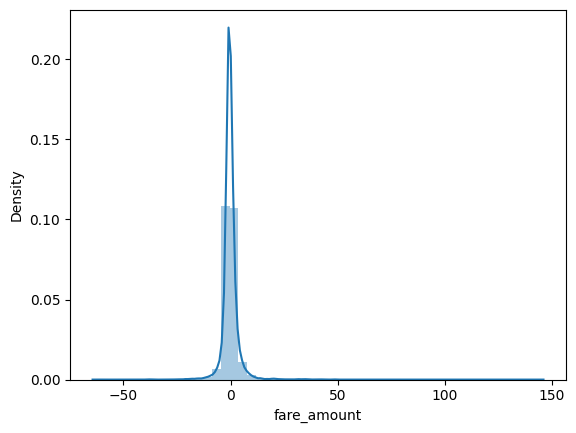

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.distplot(y_test-y_pred)

In [ ]:
# RMSE/(max(DV)-min(DV))

4.5486/(max(y)-min(y))

0.022743000000000003

In [ ]:
metrics.r2_score(y_test, y_pred)

0.7823476134435883

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  34.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  37.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  34.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  35.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  34.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  59.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  59.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  52.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  52.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  52.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  52.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=  52.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time= 2.3min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.4min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.4min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  23.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=  22.4s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.8min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time= 2.7min


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
prediction = rf_random.predict(X_test)

<ipython-input-421-abaa05feafbd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


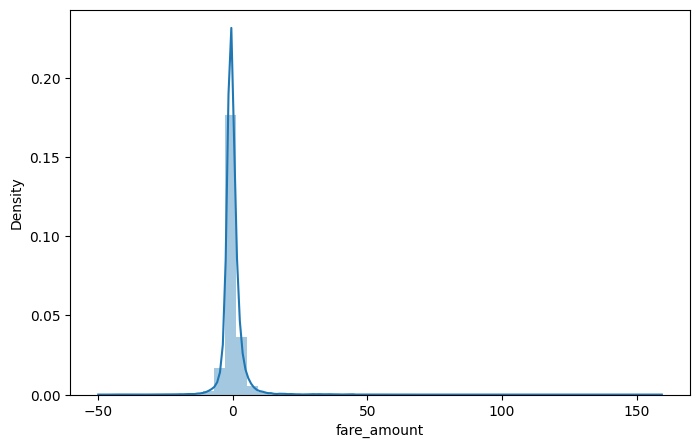

In [ ]:
plt.figure(figsize = (8,5))
sns.distplot(y_test-prediction)
plt.show()

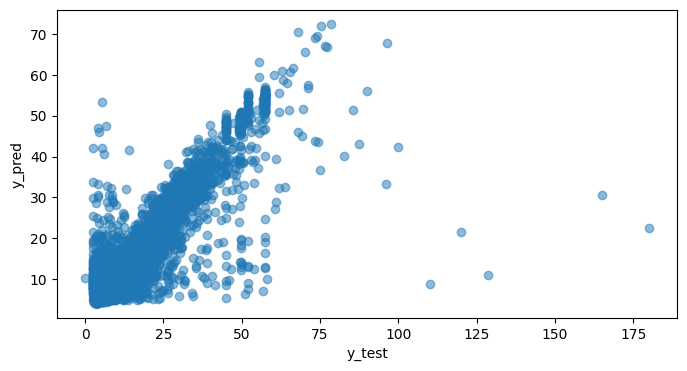

In [ ]:
plt.figure(figsize = (8,4))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.052814420190677
MSE: 19.971636183599255
RMSE: 4.468963658791516


In [ ]:
import pickle
pickle.dump(rf_regressor,open('NYC_fare.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('NYC_fare.pkl','rb'))

In [ ]:
y_prediction = pickled_model.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)

0.7823476134435883

In [ ]:
#Download Pickle File to Local Machine
from google.colab import files
files.download('NYC_fare.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>